<a href="https://colab.research.google.com/github/NishthaSharma-22/SDSS17_Stellar_Classification/blob/main/SDSS17_Stellar_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Stellar Classification - SDSS17**
*Classification of Stars, Galaxies and Quasars. Sloan Digital Sky Survey DR17*

## 1. Uploading SDSS17 dataste using Kaggle API

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"hermionegranger22","key":"6452b8c26bc6774d01d39815313639a2"}'}

In [4]:
!mkdir -p ~/.kaggle #making a directory for the file
!cp kaggle.json ~/.kaggle/ #moving the kaggle.json file to this new directory
!chmod 600 ~/.kaggle/kaggle.json # restricting permissions

In [5]:
!kaggle datasets download -d fedesoriano/stellar-classification-dataset-sdss17 # using the SDSS17 dataset with kaggle api

Dataset URL: https://www.kaggle.com/datasets/fedesoriano/stellar-classification-dataset-sdss17
License(s): copyright-authors
 58% 4.00M/6.89M [00:01<00:00, 5.22MB/s]
100% 6.89M/6.89M [00:01<00:00, 6.03MB/s]


In [10]:
!unzip dataset.zip # unzipping the dataset (and then renaming it to star.csv)

Archive:  dataset.zip
replace star_classification.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


## 2. Dataset overview and inspection

In [7]:
import pandas as pd

In [14]:
df = pd.read_csv('star.csv')

In [15]:
df.head() # to have a look at the columns and data

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

Dropping rows with missing data:

In [17]:
df = df.dropna()

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

## 3. Building Machine Learning Model (Logistic Regression)

### Importing libraries to perform encoding on the class column to assign numbers to categorical data

In [20]:
import sklearn
from sklearn.preprocessing import LabelEncoder

In [21]:
le = LabelEncoder()

In [22]:
df['class'] = le.fit_transform(df['class']) # enoding the class column

In [23]:
print(df['class'])

0        0
1        0
2        0
3        0
4        0
        ..
99995    0
99996    0
99997    0
99998    0
99999    0
Name: class, Length: 100000, dtype: int64


In [24]:
print(df['class'].unique()) # now numbers have been assigned to objects in place of names - 'Star', 'Galaxies', and 'Quasar'

[0 1 2]


In [26]:
X = df[['u', 'g', 'r', 'i', 'z', 'redshift']] #Features
y = df['class'] #Target

In [29]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 50) # splitting the dataset to training and test set

In [33]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(multi_class='ovr', max_iter=10000) # creating an instance of model

In [34]:
log_reg.fit(X_train, y_train) #Training the model on training data

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=10000, multi_class='ovr')

In [35]:
y_pred = log_reg.predict(X_test) #Making predictions on the test set

In [40]:
from sklearn.metrics import classification_report, accuracy_score

In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94     17787
           1       0.91      0.91      0.91      5669
           2       0.93      0.92      0.92      6544

    accuracy                           0.93     30000
   macro avg       0.93      0.92      0.93     30000
weighted avg       0.93      0.93      0.93     30000



In [46]:
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}") #Model has an accuracy of 93%

Accuracy: 0.93


## 4. Training a Decision Tree Model on the same dataset

In [47]:
from sklearn.tree import DecisionTreeClassifier

In [48]:
tree = DecisionTreeClassifier(random_state=50) #inintializing the decision tree

In [50]:
tree.fit(X_train, y_train) # training the model on training sets

DecisionTreeClassifier(random_state=50)

In [63]:
y_pred_tree = tree.predict(X_test) # maing predictions on the test set

In [64]:
print(classification_report(y_test, y_pred_tree))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     17787
           1       0.91      0.92      0.91      5669
           2       0.99      1.00      1.00      6544

    accuracy                           0.97     30000
   macro avg       0.96      0.96      0.96     30000
weighted avg       0.97      0.97      0.97     30000



In [65]:
print(f"Decision Tree Accuracy: {accuracy_score(y_test, y_pred_tree):.2f}") # accuracy of the model is 97%

Decision Tree Accuracy: 0.97


## 5. Visulaizing the results

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [57]:
conf_matrix = confusion_matrix(y_test, y_pred) # confusion matrix for the logistic model

In [58]:
plt.figure(figsize=(6, 5))

<Figure size 600x500 with 0 Axes>

<Figure size 600x500 with 0 Axes>

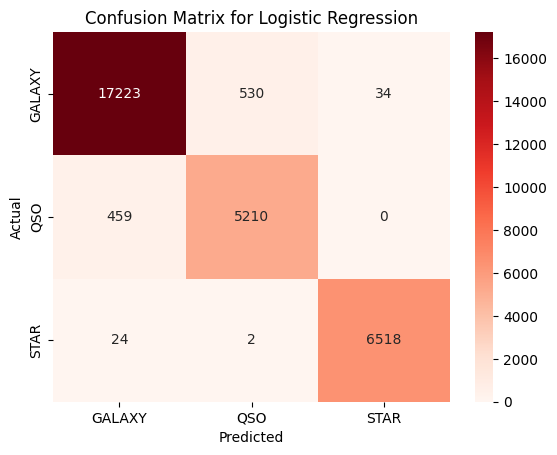

In [73]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

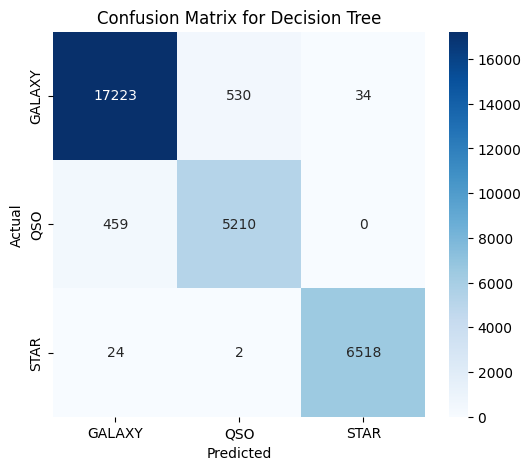

In [77]:
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree) # confusion matrix for the decision tree
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_tree, annot= True, fmt='d', cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix for Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## 6. Summary: Results

Using **Logistic regression**, the objects were classified into stars, galaxies and quasars with an accuracy of **93%** <br> Using **Decision Tree** on the same dataset returned an accuracy of **97%**.